In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using Theano backend.
/Users/akewakjeba/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


In [3]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


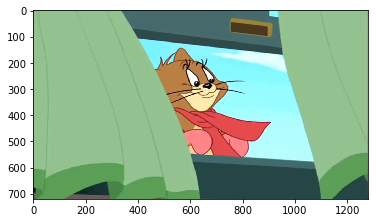

In [4]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

In [27]:
img.dtype

dtype('uint8')

In [5]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [6]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [7]:
X

array([[[[  0,  42,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [168, 204, 160],
         [142, 178, 134],
         [  4,  39,   0]],

        [[  0,  42,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [168, 204, 160],
         [142, 178, 134],
         [  4,  39,   0]],

        [[  0,  42,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [168, 204, 160],
         [142, 178, 134],
         [  3,  40,   0]],

        ...,

        [[  6,   6,  14],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 48,  70,  68],
         [ 47,  67,  66],
         [  0,  13,  13]],

        [[  6,   6,  14],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 48,  70,  68],
         [ 47,  67,  66],
         [  0,  13,  13]],

        [[  6,   6,  14],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 48,  70,  68],
        

In [8]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [30]:
y

0      1
1      1
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     0
12     2
13     2
14     1
15     1
16     2
17     1
18     2
19     2
20     2
21     0
22     0
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
268    0
269    0
270    1
271    1
272    0
273    0
274    2
275    0
276    0
277    2
278    2
279    2
280    2
281    2
282    2
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
Name: Class, Length: 298, dtype: int64

In [9]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

/Users/akewakjeba/anaconda/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [10]:
image

[array([[[156, 200, 150],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [147, 193, 144],
         [149, 192, 144],
         [164, 200, 156]],
 
        [[156, 200, 150],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [147, 193, 144],
         [149, 192, 144],
         [164, 200, 156]],
 
        [[156, 200, 151],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [147, 193, 144],
         [148, 193, 144],
         [163, 201, 156]],
 
        ...,
 
        [[101, 102, 105],
         [ 95, 104,  85],
         [ 77, 130,  79],
         ...,
         [ 36,  70,  67],
         [ 36,  70,  67],
         [ 41,  68,  65]],
 
        [[101, 102, 105],
         [ 95, 104,  85],
         [ 77, 130,  79],
         ...,
         [ 36,  70,  67],
         [ 36,  70,  67],
         [ 42,  67,  65]],
 
        [[101, 102, 105],
         [ 95, 104,  85],
         [ 78, 131,  80],
         ...,
         [ 36,  70,  67],
  

In [11]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [13]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer


In [17]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [18]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [19]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()


In [20]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer


In [21]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [22]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
# iii. Training the model
model.fit(train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Train on 208 samples, validate on 90 samples
Epoch 1/10
208/208 [==============================] - 5s 22ms/step - loss: 1.1183 - acc: 0.5144 - val_loss: 1.0208 - val_acc: 0.6444
Epoch 2/10
208/208 [==============================] - 4s 17ms/step - loss: 0.4276 - acc: 0.8798 - val_loss: 0.6435 - val_acc: 0.6111
Epoch 3/10
208/208 [==============================] - 4s 17ms/step - loss: 0.2132 - acc: 0.9375 - val_loss: 0.4731 - val_acc: 0.8222
Epoch 4/10
208/208 [==============================] - 4s 18ms/step - loss: 0.1447 - acc: 0.9423 - val_loss: 0.3625 - val_acc: 0.8556
Epoch 5/10
208/208 [==============================] - 4s 19ms/step - loss: 0.0811 - acc: 0.9856 - val_loss: 0.3452 - val_acc: 0.8667
Epoch 6/10
208/208 [==============================] - 4s 17ms/step - loss: 0.0466 - acc: 0.9952 - val_loss: 0.3740 - val_acc: 0.8333
Epoch 7/10
208/208 [==============================] - 4s 19ms/step - loss: 0.0406 - acc: 0.9904 - val_loss: 0.3322 - val_acc: 0.8444
Epoch 8/10
208/208 [====

In [25]:
predicted = model.predict(X_valid)
predicted

array([[2.86082625e-01, 4.97312471e-02, 6.64186120e-01],
       [9.65921998e-01, 1.73222050e-02, 1.67558249e-02],
       [8.43726844e-03, 9.76267576e-01, 1.52951358e-02],
       [3.46312951e-03, 1.88555773e-02, 9.77681279e-01],
       [3.21142524e-01, 1.07382923e-01, 5.71474552e-01],
       [2.00148975e-03, 6.42482075e-04, 9.97356057e-01],
       [2.59579808e-01, 1.27957938e-02, 7.27624416e-01],
       [9.97045934e-01, 1.90734840e-03, 1.04671076e-03],
       [9.97501891e-03, 1.29296649e-02, 9.77095306e-01],
       [3.52445728e-04, 9.99151230e-01, 4.96343710e-04],
       [6.78155348e-02, 4.58677799e-01, 4.73506659e-01],
       [9.92776215e-01, 2.18519079e-03, 5.03859716e-03],
       [1.50575452e-02, 9.75645244e-01, 9.29721911e-03],
       [4.55416217e-02, 1.93670839e-02, 9.35091317e-01],
       [1.17518974e-03, 2.06317194e-02, 9.78193104e-01],
       [3.38603486e-03, 3.79985385e-03, 9.92814124e-01],
       [4.94052880e-02, 4.92252894e-02, 9.01369393e-01],
       [9.97045934e-01, 1.90734

In [29]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_video.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_video.h5")
# load json and create model
json_file = open('model_video.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_video.h5")
print("Loaded model from disk")

loaded_model.save('model_video.hdf5')


ValueError: You are trying to load a weight file containing 2 layers into a model with 0 layers.

In [32]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_valid) # this gives the probablities array
Y_pred_1 = np.where( Y_pred>0.5, 1, 0) # change to 1 if probality is greater than 0.5 otherwise 0
confusion_matrix_1 = confusion_matrix(np.array(y_valid).argmax(axis=1), Y_pred_1.argmax(axis=1))
print(confusion_matrix_1)

[[26  1  6]
 [ 3 16  3]
 [ 1  0 34]]
